# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> | Fuel Efficiency prediction & Analysis |</p>

<h1 style="text-align:center; font-size: 2.5em; font-weight: bold; background: linear-gradient(90deg, #ff7eb3, #ff758c); -webkit-background-clip: text; color: transparent;">📌 Table of Contents</h1>
<ul style="font-size: 1.2em; list-style-type: none;">
    <li> <a href="#intro">Introduction</a></li>
    <li><a href="#problem">Objective</a></li>
    <li>1. <a href="#data_collection">Data Collection</a></li>
    <li>2. <a href="#eda">Exploratory Data Analysis (EDA)</a></li>
    <li>3. <a href="#preprocessing">Data Preprocessing</a></li>
    <li>4. <a href="#feature">Feature Engineering</a></li>
    <li>5. <a href="#model">Model Building</a></li>
    <li>6. <a href="#evaluation">Model Evaluation</a></li>
</ul>
<!-- CSS for Animations & Styling -->
<style>
@keyframes fadeIn {
  from { opacity: 0; }
  to { opacity: 1; }
}

h1, h2 {
  animation: fadeIn 1.5s ease-in-out;
}

ul li a {
  transition: color 0.3s;
}

ul li a:hover {
  color: #e74c3c;
}
</style>

<div style="border-radius:10px; padding: 15px; background-color: #2c3e50; font-size:120%; text-align:left; line-height:1.6;">
  <h3 align="left" style="color: violet;">Problem:</h3>
  <p style="color: #ecf0f1;"> <!-- Using a soothing purple shade -->
    This project focuses on predicting fuel efficiency using machine learning by analyzing various vehicle attributes such as engine specifications, fuel type, vehicle weight, aerodynamics, tire pressure, and driving behavior. By leveraging advanced predictive models, the goal is to assist drivers, manufacturers, and policymakers in optimizing fuel consumption, reducing costs, and lowering emissions.
    Identifying key factors affecting fuel efficiency will enable better vehicle design, smarter driving strategies, and energy-efficient transportation solutions. With a strong emphasis on model accuracy and interpretability, this study aims to provide valuable insights for sustainable mobility and improved fuel management. 🚗⛽🌍
  </p>
</div>

<div style="border-radius:10px; padding: 15px; background-color: #2c3e50; font-size:120%; text-align:left; line-height:1.6;">
  <h3 align="left" style="color: violet;">Objective:</h3>
  <p style="color: #ecf0f1;">
    <ul>
      <li><strong>Understand Key Factors:</strong> Analyze the dataset to identify patterns, distributions, and relationships between vehicle attributes (e.g., engine size, fuel type, weight, aerodynamics, and driving conditions) and their impact on fuel efficiency.</li>
      <li><strong>Conduct Extensive Exploratory Data Analysis (EDA):</strong> Perform detailed analysis to detect trends, correlations, and influential factors affecting fuel consumption and mileage.</li>
      <li><strong>Preprocessing Steps:</strong>
        <ul>
          <li>Remove irrelevant or redundant features</li>
          <li>Handle missing values using appropriate imputation techniques</li>
          <li>Address outliers that may impact model performance</li>
          <li>Encode categorical variables for machine learning compatibility</li>
          <li>Normalize numerical features to improve model accuracy</li>
        </ul>
      </li>
      <li><strong>Develop a Predictive Model:</strong> Build and fine-tune machine learning models such as Linear Regression, Random Forest, Gradient Boosting, Neural Networks, and Support Vector Regressors to predict fuel efficiency.</li>
      <li><strong>Evaluate Model Performance:</strong> Use metrics like R² Score, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) to assess model accuracy and reliability.</li>
    </ul>
  </p>
</div>


<p style="background-color: #9b59b6; font-family: calibri; color: white; font-size: 150%; text-align: center; border-radius: 15px 50px;">
   NOTE: Install the given packages if using google colab wait for all the package install then restart the session and start running code from library import
</p>

In [1]:
!pip install scikit-optimize
!pip install bayesian-optimization
#!pip install numpy==1.23.5
!pip install catboost --upgrade
#!pip install numpy==1.23.5 # Install a specific compatible numpy version
!pip install catboost --upgrade --no-cache-dir # Upgrade catboost and disable cache to ensure a clean install
!pip install --upgrade jaxlib
!pip install --upgrade jax
!pip install --upgrade tensorflow
!pip install --upgrade seaborn scipy numpy matplotlib
!pip install --upgrade --force-reinstall catboost
!pip install numpy==1.23.5 # Ensure numpy is the correct version *after* updates




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires jaxlib<=0.5.2,>=0.5.1, but you have jaxlib 0.5.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.3 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.3 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
bayesian-optimization 2.0.3 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
chex 0.1.89 requires numpy>=1

<a id="import"></a>
<p style="background-color: #9b59b6; font-family: calibri; color: white; font-size: 150%; text-align: center; border-radius: 15px 50px;">
   Import Libraries
</p>

In [1]:
#import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Integer, Real,Categorical
import xgboost as xgb
from bayes_opt import BayesianOptimization
import lightgbm as lgb
from sklearn.svm import SVR



<!-- Data Collection -->
<h2 id="data_collection" style="color: #4CAF50; text-decoration: underline;"> Data Collection</h2>


In [2]:
data = pd.read_csv("/content/autos_mpg.csv")

In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [7]:
# Convert 'horsepower' to numeric (replace '?' with NaN)
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')



In [8]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


<!-- EDA -->
<h2 id="eda" style="color: #1E90FF; text-decoration: underline;">Exploratory Data Analysis (EDA)</h2>


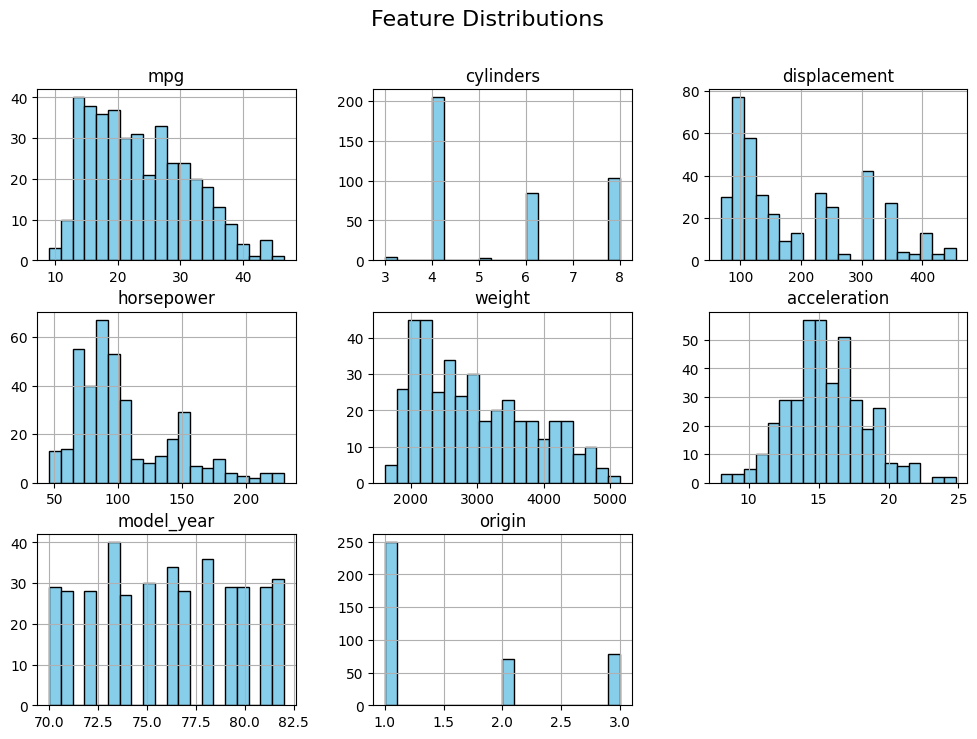

In [9]:
# Plot histograms for all numerical columns
data.hist(bins=20, figsize=(12, 8), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

<p style="background-color: #9b59b6; font-family: calibri; color: white; font-size: 150%; text-align: center; border-radius: 15px 50px;">
Feature Destribution:

1.mpg: Right-skewed, most vehicles have lower fuel efficiency.

2.Cylinders & Origin: Categorical, with peaks at common values (4, 6, 8 cylinders; 3 origins).

3.Displacement & Horsepower: Right-skewed, smaller engines and lower horsepower are more common.

4.Weight: Slightly skewed, most vehicles fall in a mid-range weight.

5.Acceleration: Nearly normal, centered around 15 seconds.

6.Model Year: Uniformly distributed across different years.
</p>

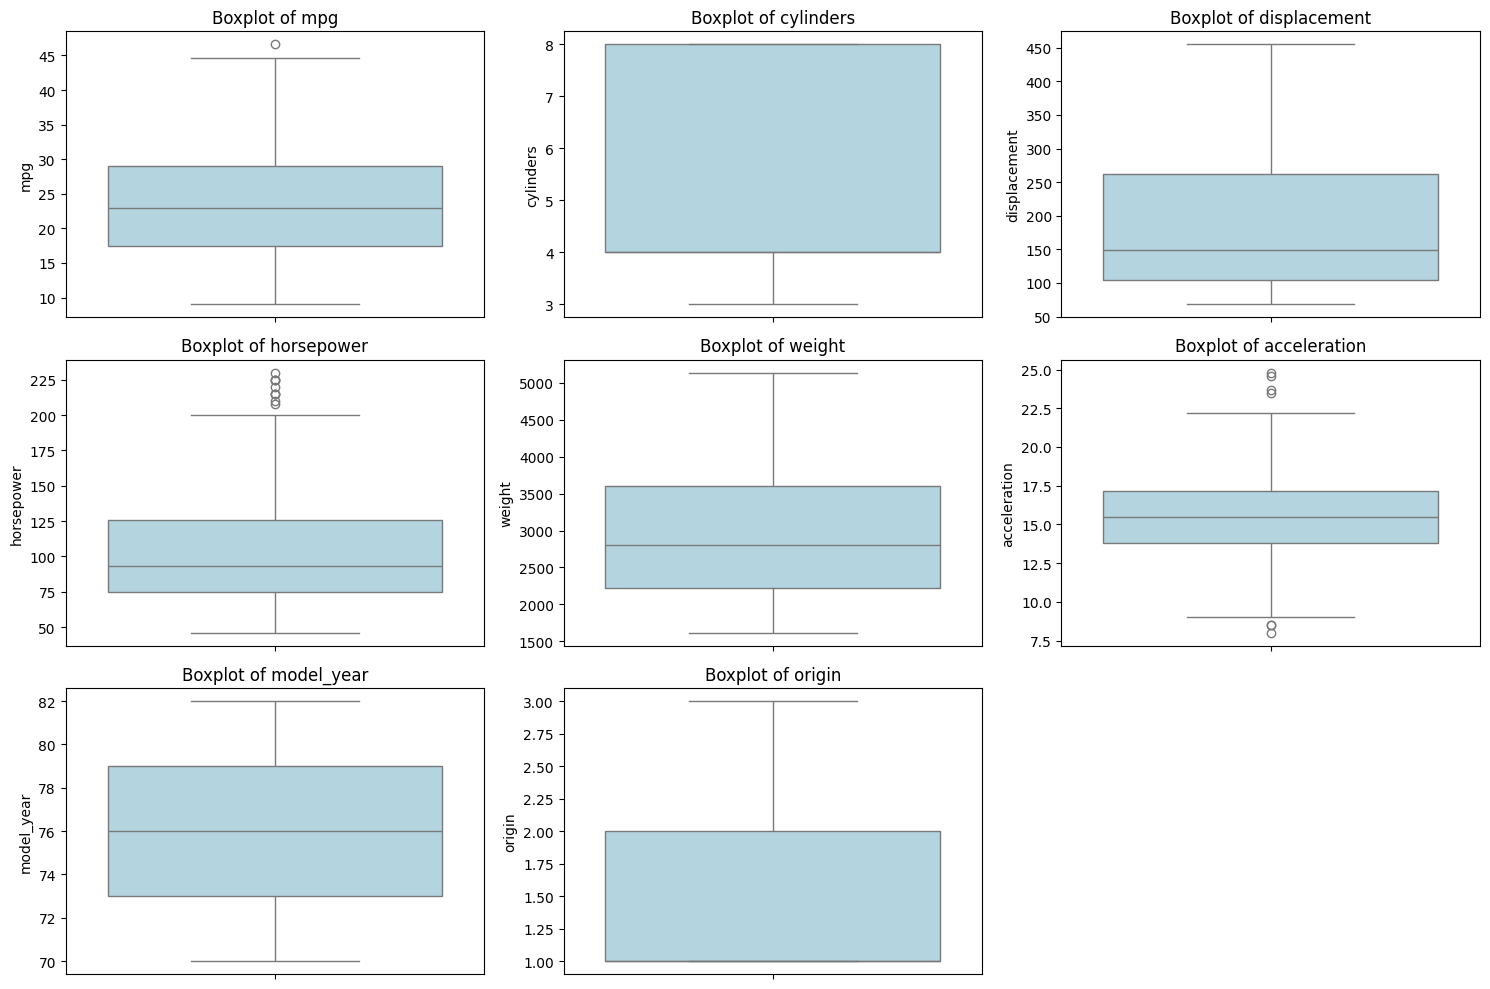

In [10]:
# Set plot size
plt.figure(figsize=(15, 10))

# List of numerical columns (excluding 'car_name' because it's categorical)
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

# Creating subplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col], color='lightblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


<p style="background-color: #9b59b6; font-family: calibri; color: white; font-size: 150%; text-align: center; border-radius: 15px 50px;">
Box-Plot Description

1.mpg, horsepower, acceleration: Show outliers at higher values.

2.Cylinders, displacement, weight: Wide interquartile ranges, indicating large variations.

3.Model year & origin: Discrete distributions with fewer variations.

4.Acceleration & horsepower: Have noticeable outliers, suggesting some extreme values.
</p>

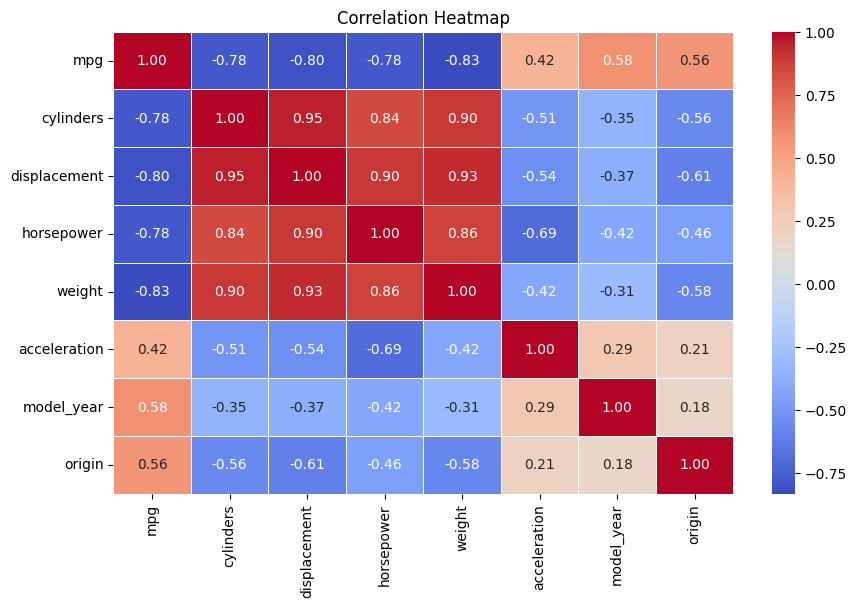

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<p style="background-color: #9b59b6; font-family: calibri; color: white; font-size: 150%; text-align: center; border-radius: 15px 50px;">
Key Insights:

1.MPG has strong negative correlations with:

Weight (-0.83), Displacement (-0.80), Cylinders (-0.78), and Horsepower (-0.78) → Heavier and more powerful vehicles tend to have lower fuel efficiency.

2.MPG has a moderate positive correlation with:

Model Year (0.58) and Origin (0.56) → Newer models and certain regions have better fuel efficiency.

3.High positive correlations between:

Cylinders, Displacement, Horsepower, and Weight (above 0.90) → Larger engines with more cylinders tend to be heavier and more powerful.
</p>

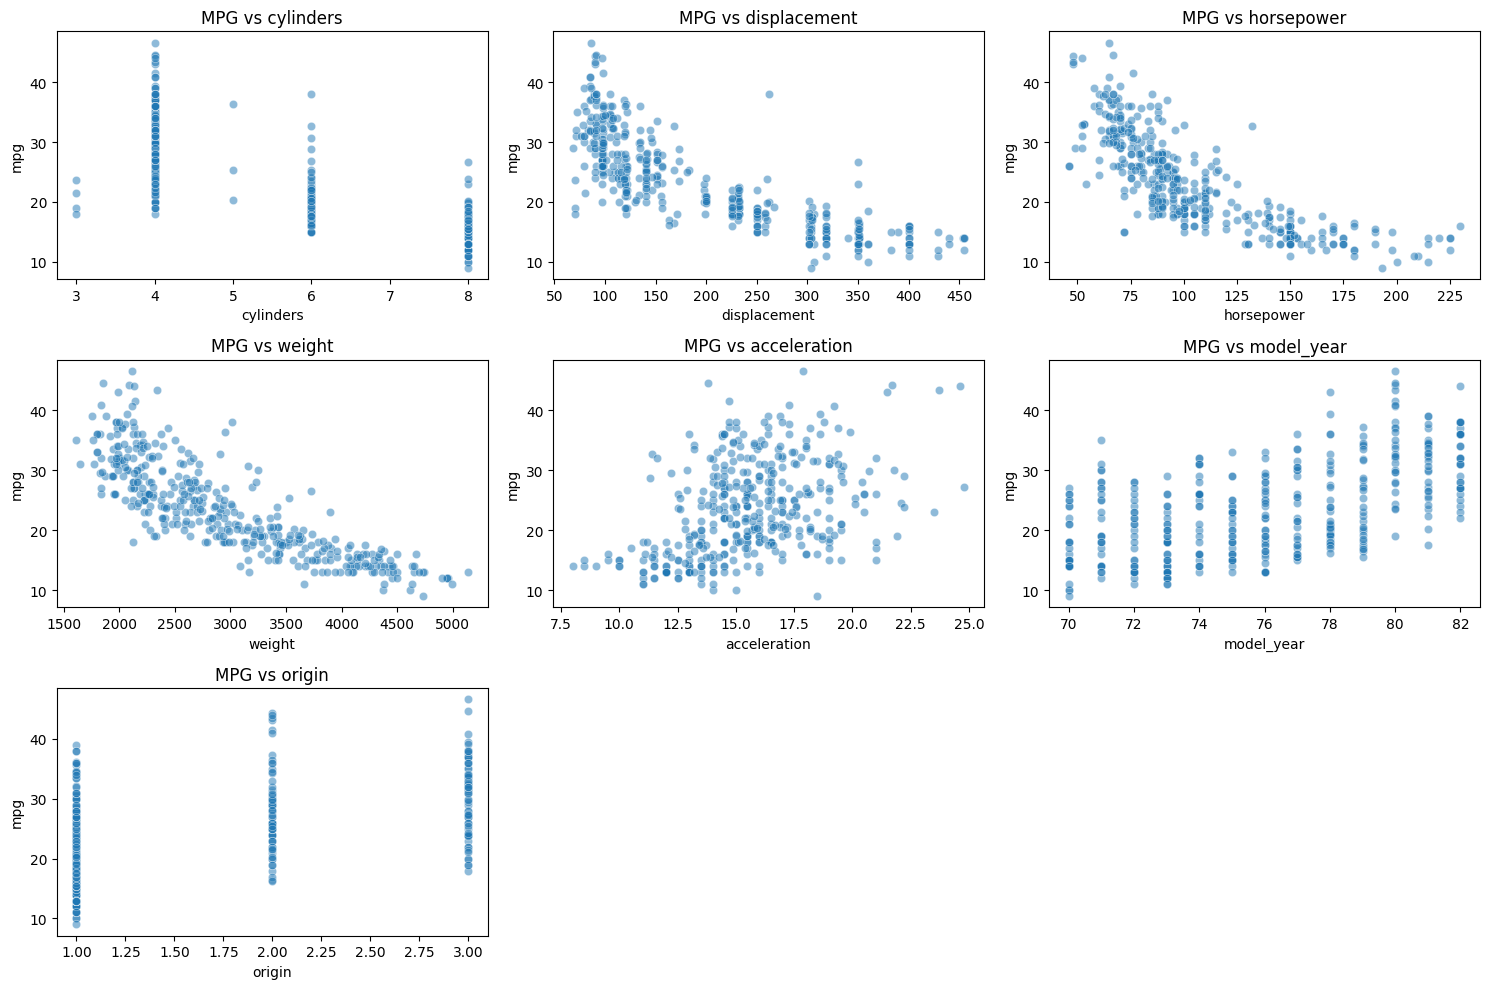

In [12]:
# List of all numerical features except 'mpg' (target variable)
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

# Set up the plot grid
plt.figure(figsize=(15, 10))

# Create scatter plots for each feature vs. mpg
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[feature], y=data["mpg"], alpha=0.5)
    plt.title(f"MPG vs {feature}")

plt.tight_layout()
plt.show()


<p style="background-color: #9b59b6; font-family: calibri; color: white; font-size: 150%; text-align: center; border-radius: 15px 50px;">
Observations:

1.MPG vs Cylinders & Origin: Discrete clusters suggest categorical relationships.

2.MPG vs Displacement, Horsepower, Weight: Strong negative correlations—higher values in these features lead to lower MPG.

3.MPG vs Acceleration: Weak correlation, suggesting acceleration has minimal impact on MPG.

4.MPG vs Model Year: Positive correlation—newer models tend to have higher MPG.
</p>

<!-- Data Preprocessing -->
<h2 id="preprocessing" style="color: #FF9800; text-decoration: underline;"> Data Preprocessing</h2>


In [13]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [14]:
# Fill missing values in 'horsepower' with the median
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)

# Convert 'displacement' to integer if it has no decimal values
if data['displacement'].mod(1).sum() == 0:
    data['displacement'] = data['displacement'].astype(int)

<ipython-input-14-4d979e4e4bde>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].median(), inplace=True)


In [15]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [16]:
# Apply One-Hot Encoding
data = pd.get_dummies(data, columns=['origin'], prefix='origin' , dtype=int)


In [17]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,1,0,0


In [18]:
data.drop(columns=['car_name'], inplace=True)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin_1      398 non-null    int64  
 8   origin_2      398 non-null    int64  
 9   origin_3      398 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 31.2 KB


In [20]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal
for col in ['mpg', 'displacement', 'weight', 'acceleration']:
    data = remove_outliers_iqr(data, col)

# Check the new shape of the dataset
print(f"New dataset size after outlier removal: {data.shape}")


New dataset size after outlier removal: (387, 10)


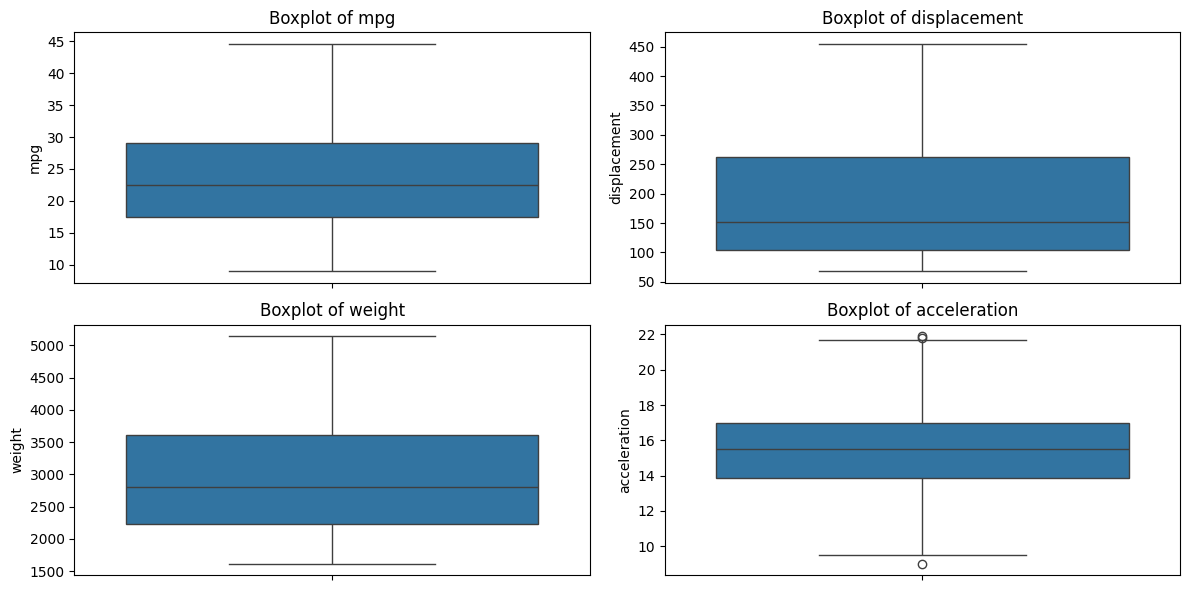

In [21]:
# Features to check for outliers
features = ['mpg', 'displacement', 'weight', 'acceleration']

# Plot boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [22]:
def count_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    return outlier_counts

numeric_columns = ['mpg',	'cylinders',	'displacement',	'horsepower',	'weight',	'acceleration',	'model_year']  # Add other numeric columns
outliers_iqr = count_outliers_iqr(data, numeric_columns)
print(outliers_iqr)


{'mpg': 0, 'cylinders': 0, 'displacement': 0, 'horsepower': 12, 'weight': 0, 'acceleration': 3, 'model_year': 0}


In [23]:
import numpy as np # Add this import statement

# Define a function to cap outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap values
    data[column] = np.where(data[column] < lower_limit, lower_limit, data[column])
    data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])

# Columns where we found outliers
outlier_columns = ['horsepower', 'acceleration']

# Apply capping to each column
for col in outlier_columns:
    cap_outliers(data, col)

# Check if outliers are capped
print(data[outlier_columns].describe())


       horsepower  acceleration
count  387.000000    387.000000
mean   103.984496     15.477972
std     35.871321      2.504987
min     46.000000      9.125000
25%     77.500000     13.850000
50%     93.500000     15.500000
75%    125.000000     17.000000
max    196.250000     21.725000


In [24]:
def count_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    return outlier_counts

numeric_columns = ['mpg',	'cylinders',	'displacement',	'horsepower',	'weight',	'acceleration',	'model_year']  # Add other numeric columns
outliers_iqr = count_outliers_iqr(data, numeric_columns)
print(outliers_iqr)


{'mpg': 0, 'cylinders': 0, 'displacement': 0, 'horsepower': 0, 'weight': 0, 'acceleration': 0, 'model_year': 0}


In [25]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin_1,0
origin_2,0
origin_3,0


In [26]:
# Calculate skewness for all numerical features
skew_values = data.skew()

# Display skewness values
print(skew_values)


mpg             0.393016
cylinders       0.524770
displacement    0.712765
horsepower      0.930139
weight          0.531285
acceleration    0.108651
model_year      0.024380
origin_1       -0.531299
origin_2        1.758750
origin_3        1.493736
dtype: float64


In [27]:
# Apply log transformation (adding 1 to avoid log(0) issues)
data['displacement'] = np.log1p(data['displacement'])
data['horsepower'] = np.log1p(data['horsepower'])

data['origin_2'] = np.log1p(data['origin_2'])
data['origin_3'] = np.log1p(data['origin_3'])

# Check skewness again
print(data.skew())



mpg             0.393016
cylinders       0.524770
displacement    0.217523
horsepower      0.331393
weight          0.531285
acceleration    0.108651
model_year      0.024380
origin_1       -0.531299
origin_2        1.758750
origin_3        1.493736
dtype: float64


# __Data Splitting:__

In [28]:
# Define features and target variable
X = data.drop(columns=['mpg'])  # Assuming 'mpg' is the target
y = data['mpg']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data & transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data (using the same scaler)
X_test_scaled = scaler.transform(X_test)


In [29]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,5.730100,4.875197,3504,12.0,70,1,0.0,0.0
1,15.0,8,5.860786,5.111988,3693,11.5,70,1,0.0,0.0
2,18.0,8,5.765191,5.017280,3436,11.0,70,1,0.0,0.0
3,16.0,8,5.720312,5.017280,3433,12.0,70,1,0.0,0.0
4,17.0,8,5.713733,4.948760,3449,10.5,70,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,5.023881,4.510860,2950,17.3,82,1,0.0,0.0
393,27.0,4,4.948760,4.465908,2790,15.6,82,1,0.0,0.0
395,32.0,4,4.912655,4.442651,2295,11.6,82,1,0.0,0.0
396,28.0,4,4.795791,4.382027,2625,18.6,82,1,0.0,0.0


In [30]:

data['origin'] = data[['origin_1', 'origin_2', 'origin_3']].idxmax(axis=1).str[-1].astype(int)
data.drop(columns=['origin_1', 'origin_2', 'origin_3'], inplace=True)


In [31]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,5.730100,4.875197,3504,12.0,70,1
1,15.0,8,5.860786,5.111988,3693,11.5,70,1
2,18.0,8,5.765191,5.017280,3436,11.0,70,1
3,16.0,8,5.720312,5.017280,3433,12.0,70,1
4,17.0,8,5.713733,4.948760,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,5.023881,4.510860,2950,17.3,82,1
393,27.0,4,4.948760,4.465908,2790,15.6,82,1
395,32.0,4,4.912655,4.442651,2295,11.6,82,1
396,28.0,4,4.795791,4.382027,2625,18.6,82,1


<!-- Model Building -->
<h2 id="model" style="color: #E74C3C; text-decoration: underline;"> Model Building</h2>



<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">Random Forest Regressor Model</span></b>
</h2>


In [32]:
# Define search space for hyperparameters
param_space = {
    'n_estimators': Integer(550, 650),
    'max_depth': Integer(35, 45),
    'min_samples_split': Integer(5, 10),  # Increase to reduce overfitting
    'min_samples_leaf': Integer(1, 2),
    'max_features': Real(0.9, 1.0),
    'bootstrap': Categorical([True])
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)




In [33]:
# Use Bayesian Optimization
bayes_search = BayesSearchCV(rf, param_space, n_iter=50, cv=5, scoring='r2', n_jobs=-1, random_state=42)
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
              random_state=42, scoring='r2',
              search_spaces={'bootstrap': Categorical(categories=(True,), prior=None),
                             'max_depth': Integer(low=35, high=45, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.9, high=1.0, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=2, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=5, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=550, high=650, prior='uniform', transform='normalize')})

In [34]:
# Best parameters
print("Best Hyperparameters:", bayes_search.best_params_)

Best Hyperparameters: OrderedDict([('bootstrap', True), ('max_depth', 42), ('max_features', 0.900447862806058), ('min_samples_leaf', 1), ('min_samples_split', 5), ('n_estimators', 642)])


In [35]:
# Train with best parameters
best_rf = bayes_search.best_estimator_
rf_pred = best_rf.predict(X_test)

In [36]:
#Evaluate
r2 = r2_score(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100  # Avoid division by zero issues

print(f"Performance of {RandomForestRegressor}:")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%\n")

Performance of <class 'sklearn.ensemble._forest.RandomForestRegressor'>:
R² Score: 0.88
MAE: 1.77
MSE: 5.18
RMSE: 2.28
MAPE: 8.74%



<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">XGBRegressor</span></b>
</h2>


In [37]:
# Define the optimization function
def xgb_evaluate(max_depth, learning_rate, n_estimators, gamma, colsample_bytree, subsample):
    params = {
        "max_depth": int(max_depth),
        "learning_rate": learning_rate,
        "n_estimators": int(n_estimators),
        "gamma": gamma,
        "colsample_bytree": colsample_bytree,
        "subsample": subsample,
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return r2_score(y_test, preds)




In [38]:
# Bayesian Optimization
param_bounds = {
    "max_depth": (3, 15),
    "learning_rate": (0.01, 0.3),
    "n_estimators": (100, 1000),
    "gamma": (0, 5),
    "colsample_bytree": (0.5, 1.0),
    "subsample": (0.5, 1.0),
}

optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=25)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.8798    | 0.6873    | 4.754     | 0.2223    | 10.18     | 240.4     | 0.578     |
| 2         | 0.8392    | 0.529     | 4.331     | 0.1843    | 11.5      | 118.5     | 0.985     |
| 3         | 0.8891    | 0.9162    | 1.062     | 0.06273   | 5.201     | 373.8     | 0.7624    |
| 4         | 0.8798    | 0.716     | 1.456     | 0.1874    | 4.674     | 362.9     | 0.6832    |
| 5         | 0.8878    | 0.728     | 3.926     | 0.06791   | 9.171     | 633.2     | 0.5232    |
| 6         | 0.8756    | 0.6984    | 1.315     | 0.1189    | 8.973     | 408.8     | 0.621     |
| 7         | 0.8689    | 0.8689    | 0.6125    | 0.2276    | 4.934     | 375.4     | 0.6667    |
| 8         | 0.8757    | 0.6052    | 4.962     | 0.07203   | 11.41     | 546.1     | 0.6438    |
| 9         | 0.869 

In [39]:
# Get the best parameters
best_params = optimizer.max["params"]
best_params["max_depth"] = int(best_params["max_depth"])
best_params["n_estimators"] = int(best_params["n_estimators"])

# Train the final model with best parameters
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)
xgb_pred = best_xgb.predict(X_test)


In [40]:
#Evaluate
r2 = r2_score(y_test, xgb_pred)
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100  # Avoid division by zero issues

print(f"Performance of {xgb.XGBRegressor}:")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%\n")


Performance of <class 'xgboost.sklearn.XGBRegressor'>:
R² Score: 0.90
MAE: 1.71
MSE: 4.66
RMSE: 2.16
MAPE: 8.68%



<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">LGBRegressor</span></b>
</h2>


In [41]:
# Define LightGBM model
lgbm = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', random_state=42)

# Define parameter space for Bayesian Optimization
param_grid = {
    'num_leaves': (20, 150),
    'max_depth': (5, 50),
    'learning_rate': (0.001, 0.3, 'log-uniform'),
    'n_estimators': (100, 1000),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'min_child_samples': (5, 50)
}

In [42]:
# Bayesian Optimization
opt = BayesSearchCV(lgbm, param_grid, n_iter=30, cv=5, scoring='r2', n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)

# Best model
best_lgbm = opt.best_estimator_
lgbm_pred = best_lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 309, number of used features: 9
[LightGBM] [Info] Start training from score 23.724272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [43]:
#Evaluate
r2 = r2_score(y_test, lgbm_pred)
mae = mean_absolute_error(y_test, lgbm_pred)
mse = mean_squared_error(y_test, lgbm_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100  # Avoid division by zero issues

print(f"Performance of {lgbm}:")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%\n")

Performance of LGBMRegressor(objective='regression', random_state=42):
R² Score: 0.89
MAE: 1.81
MSE: 5.04
RMSE: 2.24
MAPE: 9.00%



<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">Support Vector Regressor</span></b>
</h2>


In [44]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardizing the dataset

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
svr = SVR()

# Define parameter search space
param_grid = {
    'C': Real(0.1, 1000, 'log-uniform'),  # Regularization parameter
    'epsilon': Real(0.01, 1, 'log-uniform'),  # Epsilon in loss function
    'gamma': Real(0.0001, 1, 'log-uniform'),  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Different kernel types
}



In [45]:
# Bayesian Optimization
opt = BayesSearchCV(svr, param_grid, n_iter=30, cv=5, n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", opt.best_params_)




Best Hyperparameters: OrderedDict([('C', 10.765590307773657), ('epsilon', 0.39944302367237), ('gamma', 0.49576281144986684), ('kernel', 'rbf')])


In [46]:
# Predicting with the best model
svr_pred = opt.best_estimator_.predict(X_test)

In [47]:
#Evaluate
r2 = r2_score(y_test, svr_pred)
mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100  # Avoid division by zero issues

print(f"Performance of {svr}:")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%\n")

Performance of SVR():
R² Score: 0.85
MAE: 1.86
MSE: 6.89
RMSE: 2.63
MAPE: 9.71%



<!-- Model Evaluation -->
<h2 id="evaluation" style="color: #3498DB; text-decoration: underline;">📊 Model Evaluation</h2>


<div style="border-radius:10px; padding: 15px; background-color: #2c3e50; font-size:120%; text-align:left; line-height:1.6;">
  <h3 align="left" style="color: violet;">Model Explanation: Why XGBoost Regressor?

</h3>
  <p style="color: #ecf0f1;"> <!-- Using a soothing purple shade -->
    The XGBoost Regressor achieved an R² score of 90%, making it the best-performing model for fuel efficiency prediction.

Why XGBoost?

✅ Boosting Technique: XGBoost is an ensemble learning method that improves model performance by iteratively correcting errors from weak learners. It reduces bias and variance, making it highly efficient for regression problems.

✅ Handles Non-Linearity: Since fuel efficiency depends on multiple interrelated factors (e.g., weight, horsepower, and acceleration), XGBoost effectively captures complex relationships, leading to better generalization.

✅ Feature Importance: The model helps identify the most influential features affecting fuel efficiency, such as engine displacement, weight, and acceleration.

Additional Evaluation Metrics for Justification

📌 Mean Absolute Error (MAE): Indicates how close predictions are to actual values, ensuring minimal deviation.

📌 Root Mean Squared Error (RMSE): Helps assess prediction accuracy while penalizing large errors.

📌 Feature Contribution Analysis: Identifies which variables impact fuel efficiency the most, aiding in data-driven decision-making.

Thus, XGBoost Regressor is the optimal choice for fuel efficiency prediction due to its high accuracy, ability to handle complex feature interactions, and strong generalization capabilities. 🚀
  </p>
</div>

In [48]:
# True values (y_test) and Predictions (y_pred)
def evaluate_regression(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Avoid division by zero issues

    print(f"Performance of {model_name}:")
    print(f"R² Score: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%\n")

# Example usage (assuming you have trained models)
evaluate_regression(y_test, rf_pred, "Random Forest")
evaluate_regression(y_test, xgb_pred, "XGBoost")
evaluate_regression(y_test, lgbm_pred, "LightGBM")
evaluate_regression(y_test, svr_pred, "Support Vector Regressor")


Performance of Random Forest:
R² Score: 0.88
MAE: 1.77
MSE: 5.18
RMSE: 2.28
MAPE: 8.74%

Performance of XGBoost:
R² Score: 0.90
MAE: 1.71
MSE: 4.66
RMSE: 2.16
MAPE: 8.68%

Performance of LightGBM:
R² Score: 0.89
MAE: 1.81
MSE: 5.04
RMSE: 2.24
MAPE: 9.00%

Performance of Support Vector Regressor:
R² Score: 0.85
MAE: 1.86
MSE: 6.89
RMSE: 2.63
MAPE: 9.71%



In [49]:
# Dictionary to store model performances
model_performance = {}

# Function to evaluate regression models
def evaluate_regression(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    model_performance[model_name] = r2  # Store dynamically
    print(f"Performance of {model_name}: R² Score = {r2:.2f}")

# actual predictions
evaluate_regression(y_test, rf_pred, "RFR")
evaluate_regression(y_test, xgb_pred, "XGBR")
evaluate_regression(y_test, lgbm_pred, "LGBMR")
evaluate_regression(y_test, svr_pred, "SVR")


Performance of RFR: R² Score = 0.88
Performance of XGBR: R² Score = 0.90
Performance of LGBMR: R² Score = 0.89
Performance of SVR: R² Score = 0.85


<ipython-input-50-65ededb5b416>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(model_names), y=list(r2_scores), palette="viridis")


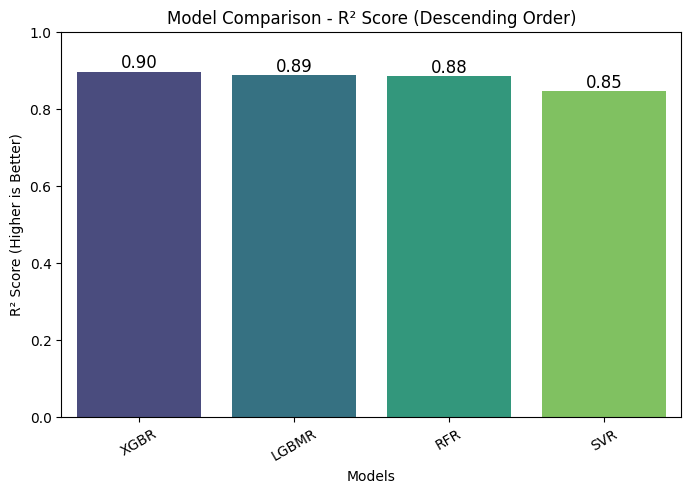

In [50]:
def plot_r2_scores():
    # Sort models based on R² scores in descending order
    sorted_models = sorted(model_performance.items(), key=lambda x: x[1], reverse=True)
    model_names, r2_scores = zip(*sorted_models)

    # Plot
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=list(model_names), y=list(r2_scores), palette="viridis")

    # Annotate values on bars
    for i, value in enumerate(r2_scores):
        ax.text(i, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

    # Labels and title
    plt.xlabel("Models")
    plt.ylabel("R² Score (Higher is Better)")
    plt.title("Model Comparison - R² Score (Descending Order)")
    plt.xticks(rotation=30)
    plt.ylim(0, 1)

    # Show the plot
    plt.show()

# Call the plotting function dynamically
plot_r2_scores()


In [51]:
# Function to evaluate and store results
def evaluate_regression(y_test, y_pred, model_name, results_dict):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Avoid division by zero issues

    # Store results dynamically
    results_dict[model_name] = {"R² Score": r2, "MAE": mae, "RMSE": rmse, "MAPE": mape}
    print(f"\nPerformance of {model_name}:")
    print(f"R² Score: {r2:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

# Dictionary to store results
model_results = {}


In [52]:
# Example usage (assuming you have trained models)
evaluate_regression(y_test, rf_pred, "RandomForestRegressor", model_results)
evaluate_regression(y_test, xgb_pred, "XGBRegressor", model_results)
evaluate_regression(y_test, lgbm_pred, "LightGBMRegressor", model_results)
evaluate_regression(y_test, svr_pred, "SupportVectorRegressor", model_results)



Performance of RandomForestRegressor:
R² Score: 0.88, MAE: 1.77, RMSE: 2.28, MAPE: 8.74%

Performance of XGBRegressor:
R² Score: 0.90, MAE: 1.71, RMSE: 2.16, MAPE: 8.68%

Performance of LightGBMRegressor:
R² Score: 0.89, MAE: 1.81, RMSE: 2.24, MAPE: 9.00%

Performance of SupportVectorRegressor:
R² Score: 0.85, MAE: 1.86, RMSE: 2.63, MAPE: 9.71%


In [53]:
# Convert dictionary to DataFrame
results_df = pd.DataFrame(model_results).T  # Transpose for better visualization
print("\nModel Performance Summary:\n", results_df)



Model Performance Summary:
                         R² Score       MAE      RMSE      MAPE
RandomForestRegressor   0.884391  1.766059  2.277017  8.744254
XGBRegressor            0.896061  1.707089  2.159040  8.682927
LightGBMRegressor       0.887681  1.812630  2.244385  9.003372
SupportVectorRegressor  0.846345  1.862622  2.625096  9.711451


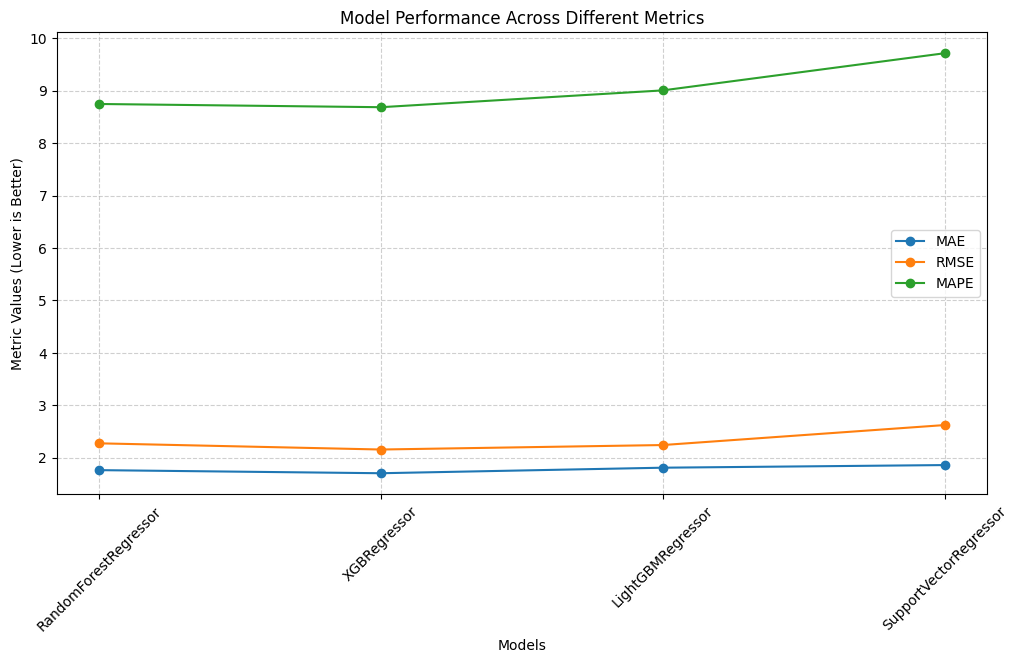

In [54]:
# Visualization: Line Plot for Multiple Metrics
plt.figure(figsize=(12, 6))
for metric in ["MAE", "RMSE", "MAPE"]:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

plt.title("Model Performance Across Different Metrics")
plt.xlabel("Models")
plt.ylabel("Metric Values (Lower is Better)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()

<p style="background-color: #9b59b6; font-family: calibri; color: white; font-size: 150%; text-align: center; border-radius: 15px 50px;">


This graph compares the performance of four regression models—Random Forest, XGBoost, LightGBM, and Support Vector Regressor (SVR)—using three evaluation metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

-> Key Observations:

XGBoost Regressor performed the best as it has the lowest MAE, RMSE, and MAPE, indicating it provides the most accurate predictions.

Random Forest Regressor performed slightly worse than XGBoost but still achieved good results, making it a reliable model.

LightGBM Regressor showed moderate performance, slightly higher errors than XGBoost and Random Forest.

Support Vector Regressor (SVR) performed the worst, having the highest errors across all metrics, making it unsuitable for this task.

Thus, XGBoost is the best choice for this regression problem, followed by Random Forest.
</p>